In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast 
from datetime import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('assets/glassdoor_clean.csv')
orig_len = len(df)
print(len(df))
df.head(2)

550


,title,dateposted,validthrough,industry,orgname,cat,descr,stars,jobid,minsal,maxsal,medsal,empid,jobtitleid,jobreqid,url
0,Data Scientist,2019-01-22,2019-02-22,AllazoHealth (industry not given),AllazoHealth,"['15-1111.00', 'Computer and Information Resea...",Company: AllazoHealth Location: New York City ...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.glassdoor.com/partner/jobListing.ht...
1,Junior Data Scientist,2019-01-15,2019-02-22,Media,Viacom,"['15-1111.00', 'Computer and Information Resea...","The Junior Data Science Engineer, Advanced Med...",3.3,3.030758e+09,100000.0,158000.0,127000.0,40260.0,406074.0,3.700016e+09,http://www.glassdoor.com/partner/jobListing.ht...


In [3]:
df.isnull().sum()[df.isnull().sum() != 0]

cat             2
jobid         163
minsal        163
maxsal        163
medsal        163
empid         163
jobtitleid    163
jobreqid      163
dtype: int64

In [4]:
df[df['cat'].isnull()]

,title,dateposted,validthrough,industry,orgname,cat,descr,stars,jobid,minsal,maxsal,medsal,empid,jobtitleid,jobreqid,url
444,Asset & Wealth Management Intelligent Digital ...,2019-01-16,2019-02-22,Finance,J.P. Morgan,NaN,J.P. Morgan Intelligent Digital Solutions (IDS...,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.glassdoor.com/partner/jobListing.ht...
486,Asset & Wealth Management Intelligent Digital ...,2019-01-18,2019-02-22,Finance,J.P. Morgan,NaN,J.P. Morgan Intelligent Digital Solutions (IDS...,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.glassdoor.com/partner/jobListing.ht...


In [5]:
df = df[pd.notnull(df['cat'])]

In [6]:
def rand_jitter(arr, frac = 0.02):
    '''Add random jitter to an array'''
    displacement = frac*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * displacement

### category

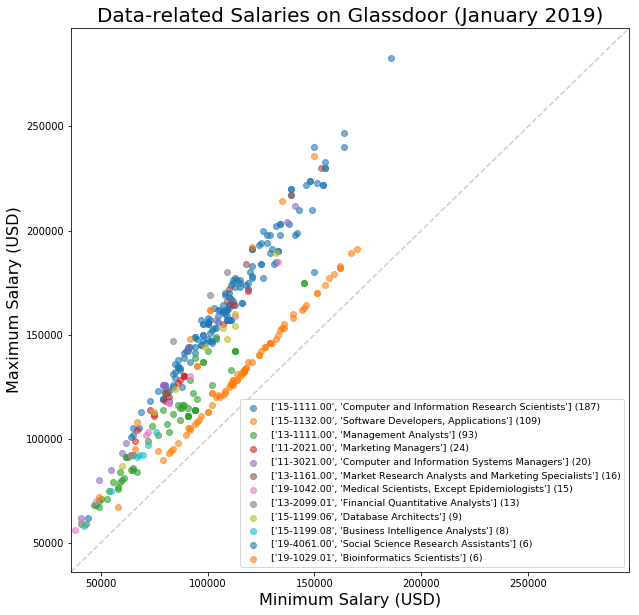

In [7]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_df = df.loc[df['cat'] == cat, ['minsal', 'maxsal']]
    if len(lil_df) > 4:
        plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = '{} ({})'.format(cat, len(lil_df)), alpha = 0.6)

plt.title('Data-related Salaries on Glassdoor (January 2019)', fontsize = 20)
plt.legend(loc = 'best', fontsize = 9.5)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Looks like we don't want "Software Developers, Applications," "Management Analysts," and "Marketing Managers," based on salary and area of expertise considerations.  

In [8]:
mask = [True if '15-1111.00' in x else False for x in df['cat']]
df = df[mask]
print(round(len(df)/orig_len, 2))

0.34


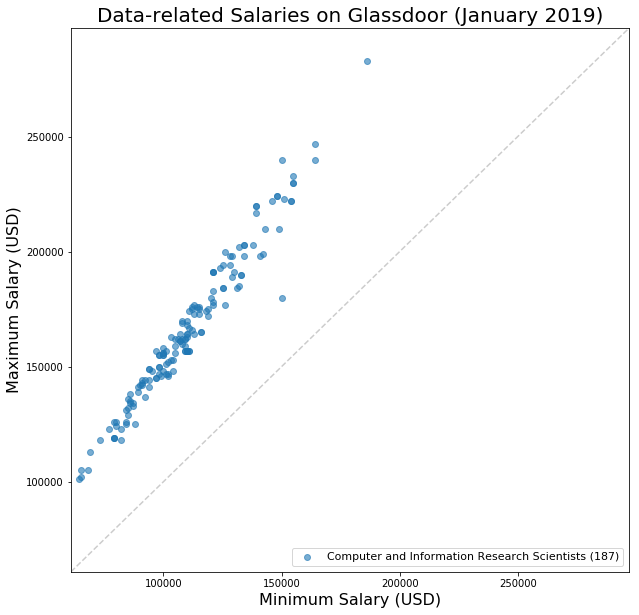

In [9]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_label = ast.literal_eval(cat)[1]
    lil_df = df.loc[df['cat'] == cat, ['minsal', 'maxsal']]
#     if len(lil_df) > 1:
    plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = '{} ({})'.format(lil_label, len(lil_df)), alpha = 0.6)

plt.title('Data-related Salaries on Glassdoor (January 2019)', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 11)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

### description

In [10]:
df['wcount'] = [len(x.split(' ')) for x in df['descr']]

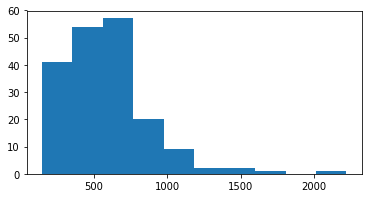

In [11]:
plt.figure(figsize = (6, 3))
df['wcount'].hist()
plt.grid(False)
plt.show();

In [12]:
keywords = []
for which in [
    'mung',
    'github', 
    'python', 
    'matplotlib',
    'd3',
    'open source', 
    ' sas ', 
    'c++', 
    ' r ',
    'sql',
    'flask',
    'shiny',
    ' aws ',
    'amazon',
    'hadoop',
    'spark',
    'excel',
    'matlab',
    'scala',
    'architect',
    'data engineer',
    'machine learning',
    'nlp',
    'keras',
    'tensorflow',
    'neural',
    'statistics',
    'advanced degree',
    'phd',
    'kaggle', 
    'women', 
    'female', 
    'travel',
    'parental',
    'family',
    'remote',
    'vacation',
    'julia',
    'java',
    'html',
    'css',
    'cnn',
    'deep learning',
    'lunch',
    'data analyst',
    'data sci',
    'tableau', 
    'visualization'
]:
    keywords.append((which.lstrip().rstrip(), sum([True if which in x.lower() else False for x in df['descr']])))
keywords = pd.DataFrame(keywords, columns = ['keyword', 'count']).sort_values(by = 'count', ascending = False).set_index('keyword')

In [13]:
mask = [True if 'd3' in x.lower() else False for x in df['descr']]

df[mask]['orgname'].value_counts()

PwC                          2
RBC                          1
Trigyn Technologies, Inc.    1
Tempus Labs                  1
Deloitte                     1
CBS Corporation              1
Clarity Insights             1
Gartner, Inc.                1
Galvanize                    1
ERGO Interactive             1
Bloomberg                    1
Spotify                      1
Rockefeller Foundation       1
Name: orgname, dtype: int64

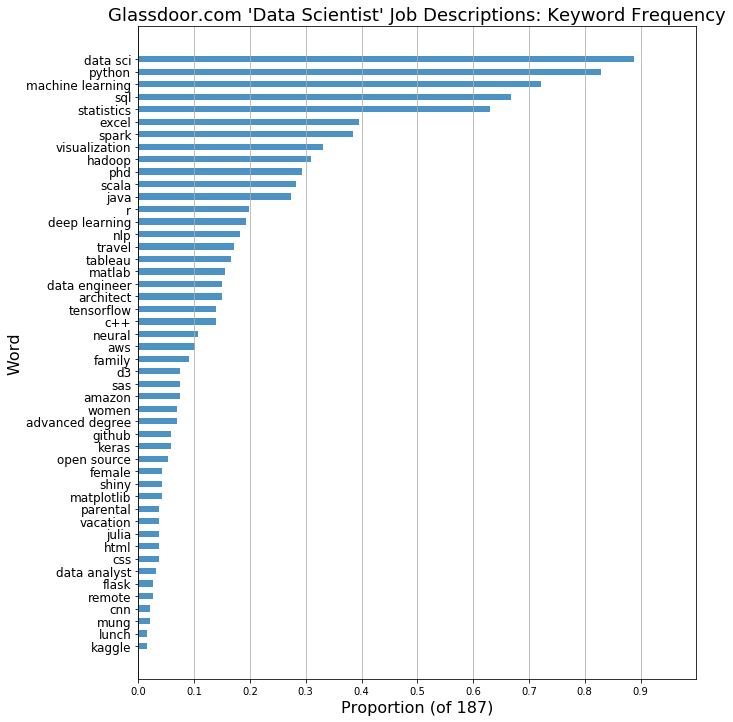

In [14]:
plt.figure(figsize = (10, 12))

plt.barh(range(len(keywords)), keywords['count'][::-1]/len(df), 0.5, alpha = 0.8)

plt.title('Glassdoor.com \'Data Scientist\' Job Descriptions: Keyword Frequency', fontsize = 18)

plt.xlabel('Proportion (of {})'.format(len(df)), fontsize = 16)
plt.xlim([0, 1])
plt.xticks(np.arange(0, 1, 0.1))
plt.ylabel('Word', fontsize = 16)
plt.yticks(range(len(keywords)), keywords.index[::-1], rotation = 0, fontsize = 12)

plt.grid(which = 'major', axis = 'x')

plt.axvline(0, lw = 1.5, color = 'k', alpha = 0.6)

plt.show();

In [15]:
print(len(df))

exclude = [
#     ' sas ', 
#     'hadoop',
#     'excel',
#     'sql'
]
for wordlet in exclude:
    mask = [False if wordlet in x.lower() else True for x in df['descr']]
    df = df[mask]

print(len(df))

require = [
    'python',
#     'data sci'
]
for wordlet in require:
    mask = [True if wordlet in x.lower() else False for x in df['descr']]
    df = df[mask]
    
print(len(df))

187
187
155


### stars

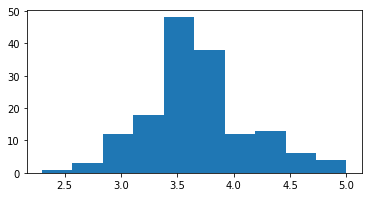

In [16]:
plt.figure(figsize = (6, 3))
df['stars'].hist()
plt.grid(False)
plt.show();

In [17]:
print(df['stars'].min())
print(df['stars'].max())

2.3
5.0


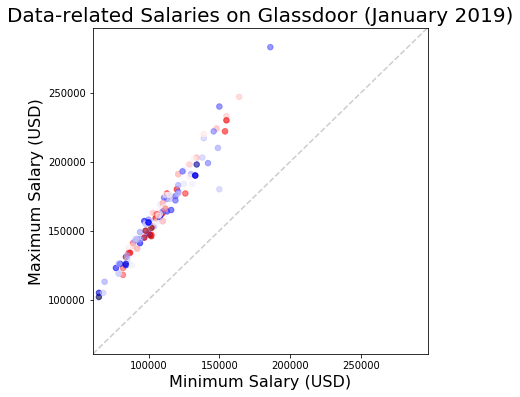

In [18]:
plt.figure(figsize = (6, 6))

plt.scatter(
    df['minsal'], 
    df['maxsal'], 
    alpha = 0.6, 
    c = df['stars'],
    cmap = 'seismic',
    vmin = df['stars'].min(),
    vmax = df['stars'].max(),
    s = 30
)

plt.title('Data-related Salaries on Glassdoor (January 2019)', fontsize = 20)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

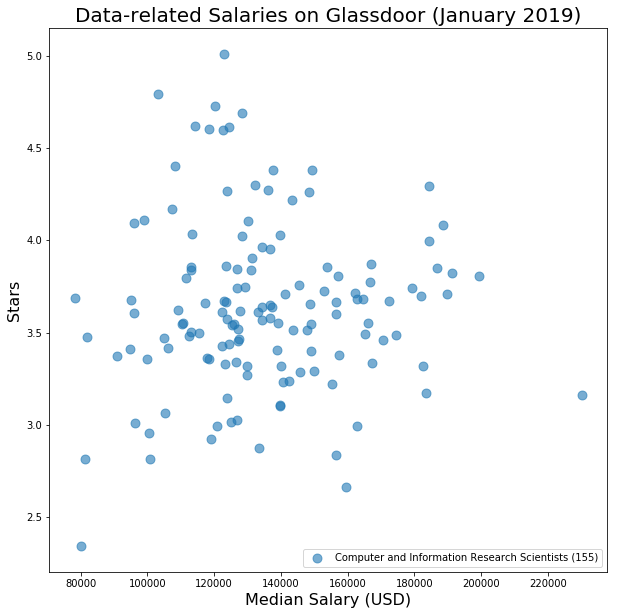

In [19]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_label = ast.literal_eval(cat)[1].split(',')[0]
    lil_df = df.loc[df['cat'] == cat, ['stars', 'medsal']]
#     if len(lil_df) > 10:
    plt.scatter(
        rand_jitter(lil_df['medsal']), 
        rand_jitter(lil_df['stars']), 
        label = '{} ({})'.format(lil_label, len(lil_df)), 
        alpha = 0.6, 
        s = 80
    )

plt.title('Data-related Salaries on Glassdoor (January 2019)', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 10)
plt.xlabel('Median Salary (USD)', fontsize = 16)
plt.ylabel('Stars', fontsize = 16)
plt.show();

### industry

In [20]:
## any with missing industry were assigned company name as industry
df['industry'].value_counts()

Information Technology                42
Business Services                     28
Media                                 17
Finance                               16
Accounting & Legal                    14
Health Care                           10
Insurance                              7
Retail                                 5
Travel & Tourism                       3
Biotech & Pharmaceuticals              2
IBM (industry not given)               2
Consumer Services                      2
Non-Profit                             2
Education                              1
Transportation & Logistics             1
Construction, Repair & Maintenance     1
Telecommunications                     1
Oath (industry not given)              1
Name: industry, dtype: int64

### organization name & employer ID

In [21]:
df['orgname'].value_counts()[df['orgname'].value_counts() > 1]

KPMG                               6
Deloitte                           5
New York Life                      5
HBO                                4
Amazon                             4
S&P Global                         3
Jet                                3
GQR Global Markets                 3
Nielsen                            3
J.P. Morgan                        2
CBS Corporation                    2
Citibank                           2
Liquidnet                          2
Synechron Inc.                     2
Partners In Care                   2
PwC                                2
NJF Global Holdings                2
24 Seven Talent                    2
Spotify                            2
Bloomberg                          2
TripleLift                         2
VNSNY                              2
Google                             2
IBM                                2
Open Systems Technologies (NYC)    2
Memorial Sloan-Kettering           2
APHSA                              2
D

### jobtitleid

In [22]:
df['jobtitleid'].value_counts().head()

-1.0         60
 119899.0    36
 274009.0    10
 213788.0     4
 417547.0     3
Name: jobtitleid, dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Job title ID "-1" appears to be given to job titles that are wordier than the standard set.  See examples below. 

In [23]:
## check out -1
df.loc[df['jobtitleid'] == -1, 'title'].value_counts()[:10]

Associate Director, Lead Data Scientist                2
Senior Data Scientist-Fraud                            2
Senior Data Scientist, CHOICE                          2
Data Scientist (Data mining / Statistical analysis)    1
Sr Data Scientist (Actuaries Apply)                    1
Strategy Finance Data Scientist                        1
Junior Data Scientist/Quant Developer                  1
Staff Data Scientist - Machine Learning                1
Director, Data Scientist, NLP                          1
Data Scientist 120547                                  1
Name: title, dtype: int64

In [24]:
## check out not -1
jobtitleid_dict = {}
for jobtitleid in list(df['jobtitleid'].value_counts().index):
    if jobtitleid == -1:
        pass
    else:
        x = df.loc[df['jobtitleid'] == jobtitleid, 'title'].value_counts()
        jobtitleid_dict.update({jobtitleid : (x.index)[0]})
        print(str(jobtitleid) + '    ', '\t', x.sum(), '\t', list(x.index))

119899.0     	 36 	 ['Data Scientist']
274009.0     	 10 	 ['Senior Data Scientist']
213788.0     	 4 	 ['Principal Data Scientist']
417547.0     	 3 	 ['Data Scientist, Analytics']
567229.0     	 3 	 ['Lead Data Scientist']
3069904.0     	 3 	 ['Sr. Data Scientist']
3206325.0     	 2 	 ['Sr. Associate, Data Scientist']
2377004.0     	 2 	 ['Director Data Scientist']
406074.0     	 2 	 ['Junior Data Scientist']
1108008.0     	 1 	 ['Security Data Scientist']
3529004.0     	 1 	 ['Data Scientist - AWS Professional Services']
1293511.0     	 1 	 ['Data Scientist - Manager']
851197.0     	 1 	 ['Data Scientist, Engineering']
1296173.0     	 1 	 ['Research Data Scientist']
967069.0     	 1 	 ['Quantitative Data Scientist']
3986219.0     	 1 	 ['Data Scientist: Machine Learning Engineer']
3791702.0     	 1 	 ['Data Scientist - NLP']
424171.0     	 1 	 ['Data Scientist - Data visualization']
864919.0     	 1 	 ['Data Scientist (R&D)']


## Selection

In [25]:
df = df[pd.notnull(df['jobid'])]
df['jobid'] = [str(int(x)) for x in df['jobid']]
print(len(df))

135


In [26]:
already_applied = [

]

under_over_qual = [
    
]

mask = [False if x in already_applied else True for x in df['jobid']]

df = df[mask]

mask = [False if x in under_over_qual else True for x in df['jobid']]

df = df[mask]

In [27]:
no = [

]

mask = [False if x in no else True for x in df['orgname']]

df = df[mask]
print(len(df))

135


In [28]:
title_keywords = []
for which in [
    'director',
    'manager',
    'vice ',
    'architect',
#     'senior data',
#     'instructor',
    'cib qr',
    'quantitative research',
#     'sr.',
#     'sr ',
    'azure'
]:
    title_keywords.append((which.lstrip().rstrip(), sum([True if which in x.lower() else False for x in df['title']])))
title_keywords = pd.DataFrame(title_keywords, columns = ['keyword', 'count']).sort_values(by = 'count', ascending = False).set_index('keyword')

In [29]:
for word in list(title_keywords.index):
    mask = [True if word in x.lower() else False for x in df['title']]
    if len(df[mask] > 0):
        print(word, ': ', len(df[mask]))
        print(df[mask]['title'].value_counts())
        print('\n')

director :  7
Associate Director, Lead Data Scientist                             2
Director Data Scientist                                             2
Director Data Scientist – Marketing Analytics, Advanced Modeling    1
Director, Data Scientist, NLP                                       1
Specialist Director, Data Scientist                                 1
Name: title, dtype: int64


manager :  2
Data Scientist - Manager        1
Manager, Data Scientist, NLP    1
Name: title, dtype: int64


vice :  1
Data Scientist - AWS Professional Services    1
Name: title, dtype: int64




In [30]:
print(len(df))

for wordlet in list(title_keywords.index):
    mask = [False if wordlet in x.lower() else True for x in df['title']]
    df = df[mask]

print(len(df))

135
125


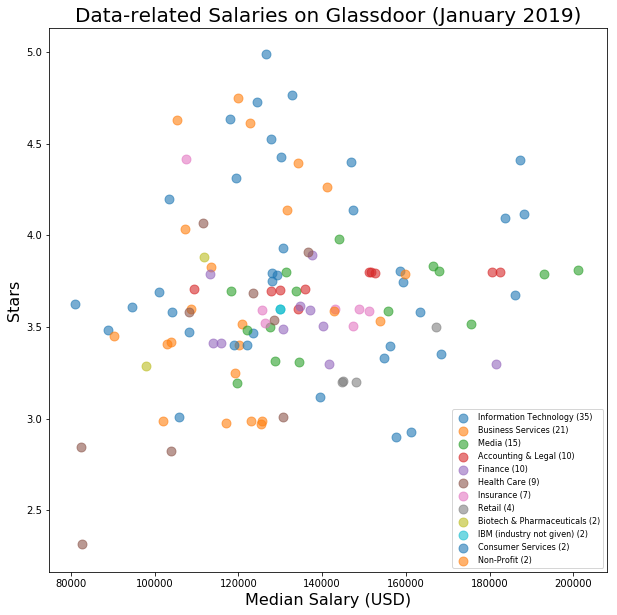

In [31]:
plt.figure(figsize = (10, 10))

for industry in list(df['industry'].value_counts().index):
    lil_df = df.loc[df['industry'] == industry, ['stars', 'medsal']]
    if len(lil_df) > 1:
        plt.scatter(
            rand_jitter(lil_df['medsal']), 
            rand_jitter(lil_df['stars']), 
            label = '{} ({})'.format(industry, len(lil_df)), 
            alpha = 0.6, 
            s = 80
        )

plt.title('Data-related Salaries on Glassdoor (January 2019)', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 8)
plt.xlabel('Median Salary (USD)', fontsize = 16)
plt.ylabel('Stars', fontsize = 16)
plt.show();

## Top 10 highest max salary

In [32]:
df.sort_values(by = 'maxsal', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'maxsal']]#[:10]

,title,dateposted,industry,orgname,stars,jobid,minsal,maxsal
102,HBO Sr. Data Scientist /Lead Data Scientist,2019-01-23,Media,HBO,3.8,3008197155,164000.0,247000.0
79,HBO Lead Data Scientist Analytic Capabilities,2019-01-18,Media,HBO,3.8,3091068289,155000.0,233000.0
131,Senior Data Scientist,2019-01-15,Information Technology,Bloomberg,3.7,3064125184,155000.0,230000.0
207,"Data Scientist Technical Lead, Google Maps",2019-01-19,Information Technology,Google,4.4,3068524250,155000.0,230000.0
124,Senior Data Scientist-XSP,2019-01-20,Accounting & Legal,Deloitte,3.8,3092146222,148000.0,224000.0
137,Senior Data Scientist,2019-01-20,Accounting & Legal,Deloitte,3.8,3092176395,148000.0,224000.0
105,"Senior Data Scientist, User Fraud",2019-01-12,Information Technology,Spotify,4.1,2998579693,154000.0,222000.0
337,"Senior Data Scientist, Experimentation Practice",2019-01-17,Information Technology,Spotify,4.1,3089419983,154000.0,222000.0
237,Data Scientist and Quantitative Dev Lead,2019-01-14,Finance,Liquidnet,3.3,2959775546,146000.0,222000.0
41,Data Scientist,2019-01-22,Media,CBS Television Stations,3.5,3007407248,139000.0,217000.0


## Highest star ratings

In [33]:
df.sort_values(by = 'stars', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:10]

,title,dateposted,industry,orgname,stars,jobid,minsal,medsal,maxsal
157,Data Scientist: Machine Learning Engineer,2019-01-18,Information Technology,pymetrics,5.0,3089972931,102000.0,125000.0,152000.0
39,Data Scientist,2019-01-15,Information Technology,SeatGeek,4.8,2498217908,109000.0,133000.0,162000.0
343,Lead Data Scientist,2019-01-11,Business Services,TripleLift,4.7,3027480890,98000.0,122000.0,150000.0
56,"Data Scientist, Analytics",2019-01-15,Business Services,TripleLift,4.7,2802182714,84000.0,106000.0,131000.0
4,Data Scientist,2019-01-10,Information Technology,Asana,4.7,2907798529,102000.0,121000.0,146000.0
125,Senior Data Scientist,2019-01-22,Business Services,Bounce Exchange,4.6,2776163159,101000.0,122000.0,147000.0
103,Data Scientist - NLP,2019-01-13,Information Technology,CompStak,4.6,3085993953,97000.0,119000.0,145000.0
40,Data Scientist,2019-01-19,Information Technology,Enigma,4.5,2733226886,103000.0,127000.0,153000.0
12,Data Scientist,2019-01-10,Business Services,Dstillery,4.4,3059134598,110000.0,134000.0,163000.0
152,"Data Scientist, Risk Associate",2019-01-22,Insurance,Global Atlantic Financial Group,4.4,3069849033,87000.0,108000.0,134000.0


## Most recently posted

In [34]:
df.sort_values(by = 'dateposted', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:10]

,title,dateposted,industry,orgname,stars,jobid,minsal,medsal,maxsal
102,HBO Sr. Data Scientist /Lead Data Scientist,2019-01-23,Media,HBO,3.8,3008197155,164000.0,203000.0,247000.0
25,"Data Scientist - Principal - New York, NY",2019-01-23,Information Technology,Clarity Insights,4.0,2883287151,105000.0,131000.0,162000.0
97,Data Scientist,2019-01-23,Information Technology,Synechron Inc.,3.5,3094774102,68000.0,85000.0,105000.0
96,Data Scientist,2019-01-23,Media,CBS Corporation,3.5,3039400914,98000.0,124000.0,155000.0
146,Senior Data Scientist,2019-01-23,Information Technology,Synechron Inc.,3.5,3094379509,85000.0,105000.0,129000.0
109,Sr. Data Scientist,2019-01-23,Information Technology,Nielsen,3.6,2972323542,79000.0,97000.0,119000.0
158,Senior Data Scientist Underwriting Analytics,2019-01-23,Insurance,New York Life,3.6,3094607779,125000.0,151000.0,184000.0
106,"Data Scientist - Finance, Actuarial and Produc...",2019-01-23,Insurance,New York Life,3.6,3094608271,100000.0,125000.0,155000.0
7,Data Scientist,2019-01-23,Business Services,ERGO Interactive,3.0,2972562072,94000.0,116000.0,141000.0
41,Data Scientist,2019-01-22,Media,CBS Television Stations,3.5,3007407248,139000.0,175000.0,217000.0
